Laboratorio Funzione di Costo
implementare e interpretare la funzione di costo per la regressione lineare con una sola variabile.

Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Definizione funzioni

In [5]:
def compute_cost(x, y, w, b):
    """
    Calcola la funzione di costo (MSE con fattore 1/(2m)) per la regressione lineare.
    J(w,b) = (1/(2m)) * Σ ( (w*x_i + b) - y_i )^2
    """
    m = x.shape[0]          # numero di esempi
    cost_sum = 0.0          # accumulatore della somma degli errori quadratici

    for i in range(m):
        f_wb = w * x[i] + b                 # predizione del modello sul punto i
        cost_sum += (f_wb - y[i])**2        # aggiungo (errore^2)

    return cost_sum / (2*m)                 # media con fattore 1/(2m)


def plot_cost_vs_w(x, y, b_fixed=0.0, w_min=-50, w_max=400, num=200):
    """Grafico del costo J(w, b_fixed) al variare di w."""
    w_vals = np.linspace(w_min, w_max, num)  # griglia di w
    J_vals = np.array([compute_cost(x, y, w, b_fixed) for w in w_vals])  # costo per ogni w

    w_best = w_vals[np.argmin(J_vals)]  # w con costo minimo (sulla griglia)
    J_best = np.min(J_vals)             # valore minimo del costo

    plt.figure(figsize=(7,4))
    plt.plot(w_vals, J_vals)
    plt.scatter([w_best], [J_best])
    plt.xlabel("w")
    plt.ylabel("J(w, b fissato)")
    plt.title(f"Costo vs w (b={b_fixed})")
    plt.grid(True, alpha=0.25)
    plt.show()

    return w_best, J_best


def plot_data_and_lines(x, y, w_list, b=0.0):
    """Mostra i punti dati e alcune rette candidate."""
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, marker='x')

    x_line = np.linspace(np.min(x)-0.2, np.max(x)+0.2, 100)  # asse x continuo per le rette

    for w in w_list:
        plt.plot(x_line, w*x_line + b, label=f"w={w}, b={b}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Dati e rette candidate")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.show()


def plot_cost_surface(x, y, w_range=(0,400), b_range=(-200,200), n=120):
    """Contour plot del costo J(w,b) su una griglia; restituisce anche il minimo sulla griglia."""
    w_vals = np.linspace(w_range[0], w_range[1], n)
    b_vals = np.linspace(b_range[0], b_range[1], n)

    W, B = np.meshgrid(w_vals, b_vals)  # griglia 2D di (w,b)
    J = np.zeros_like(W)                # matrice dove salvare i costi

    for i in range(n):
        for j in range(n):
            J[i, j] = compute_cost(x, y, W[i, j], B[i, j])  # costo per ogni coppia (w,b)

    plt.figure(figsize=(7,4))
    levels = np.percentile(J, [5,10,20,30,40,50,60,70,80,90])  # livelli di costo
    cs = plt.contour(W, B, J, levels=levels)
    plt.clabel(cs, inline=1, fontsize=8)
    plt.xlabel("w")
    plt.ylabel("b")
    plt.title("Curve di livello della funzione di costo J(w,b)")
    plt.grid(True, alpha=0.2)
    plt.show()

    idx = np.unravel_index(np.argmin(J), J.shape)  # posizione del minimo
    w_best, b_best, J_best = W[idx], B[idx], J[idx]
    return w_best, b_best, J_best


def plot_soup_bowl():
    """Grafico didattico: superficie convessa simmetrica (una 'ciotola')."""
    u = np.linspace(-5, 5, 200)
    v = np.linspace(-5, 5, 200)
    U, V = np.meshgrid(u, v)
    Z = U**2 + V**2

    plt.figure(figsize=(6,5))
    levels = [0.5, 2, 4, 8, 12, 18, 25, 32, 40]
    plt.contour(U, V, Z, levels=levels)
    plt.xlabel("Parametro 1")
    plt.ylabel("Parametro 2")
    plt.title("Esempio di superficie convessa ('soup bowl')")
    plt.grid(True, alpha=0.2)
    plt.show()


def plot_real_cost_surface_3d(x, y):
    w_vals = np.linspace(-100, 400, 100)
    b_vals = np.linspace(-200, 200, 100)

    W, B = np.meshgrid(w_vals, b_vals)
    J = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            J[i,j] = compute_cost(x, y, W[i,j], B[i,j])

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, J)

    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("J(w,b)")
    ax.set_title("VERA funzione di costo della regressione lineare")

    plt.show()



Dati di esempio (semplici e “puliti”)

In [6]:
# Esempio didattico: x = dimensione, y = prezzo (numeri inventati ma lineari)
x = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([300.0, 500.0, 700.0, 900.0])

print("x:", x)
print("y:", y)


x: [1. 2. 3. 4.]
y: [300. 500. 700. 900.]


Step 1: vedere i dati e alcune rette candidate, scelgo w in modo arbitrario da 100 a 300

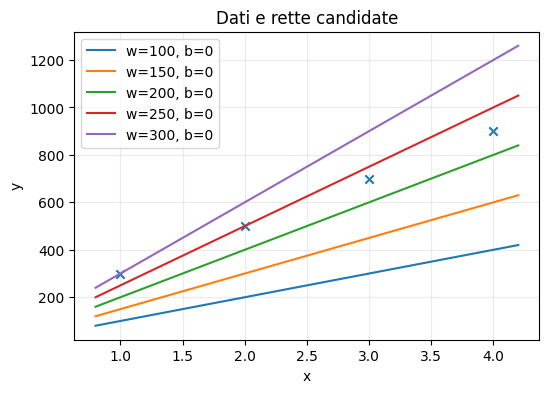

In [7]:
plot_data_and_lines(x, y, w_list=[100, 150, 200, 250, 300], b=0)

Step 2: calcolo “a mano” del costo per un paio di scelte, con w_test 200 e 250

In [8]:
w_test = 200
b_test = 0
J = compute_cost(x, y, w_test, b_test)
print(f"Costo con w={w_test}, b={b_test} -> J = {J:.2f}")

w_test = 250
J = compute_cost(x, y, w_test, b_test)
print(f"Costo con w={w_test}, b={b_test} -> J = {J:.2f}")


Costo con w=200, b=0 -> J = 5000.00
Costo con w=250, b=0 -> J = 1875.00


Step 3: grafico del costo al variare di w (b fisso)

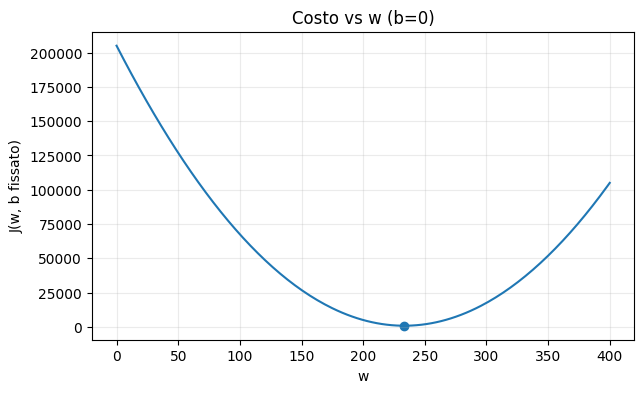

Miglior w (su griglia): 233.16582914572862
Costo minimo: 833.4385495315776


In [9]:
w_best, J_best = plot_cost_vs_w(x, y, b_fixed=0, w_min=0, w_max=400, num=200)
print("Miglior w (su griglia):", w_best)
print("Costo minimo:", J_best)


Step 4: curve di livello del costo in (w,b)

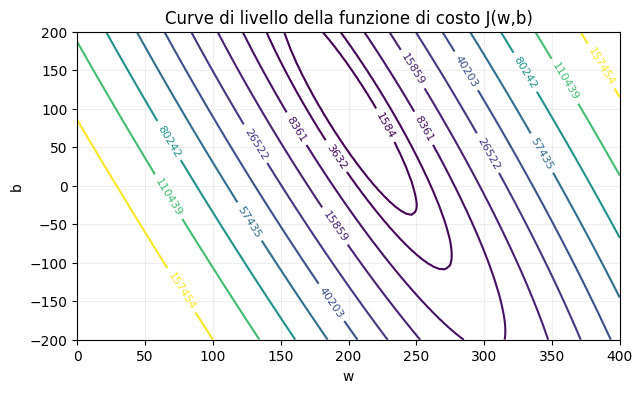

Miglior (w,b) sulla griglia: 202.02020202020202 94.94949494949498
Costo minimo sulla griglia: 2.5507601265176314


In [10]:
w_best, b_best, J_best = plot_cost_surface(x, y, w_range=(0,400), b_range=(-200,200), n=100)
print("Miglior (w,b) sulla griglia:", w_best, b_best)
print("Costo minimo sulla griglia:", J_best)


Step 5: “soup bowl” (solo convexity, senza dati)

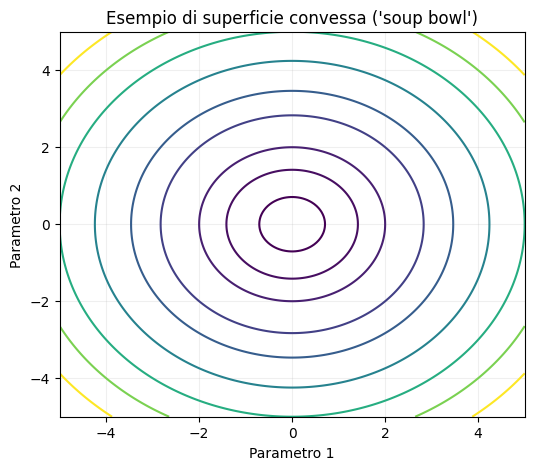

In [11]:
plot_soup_bowl()

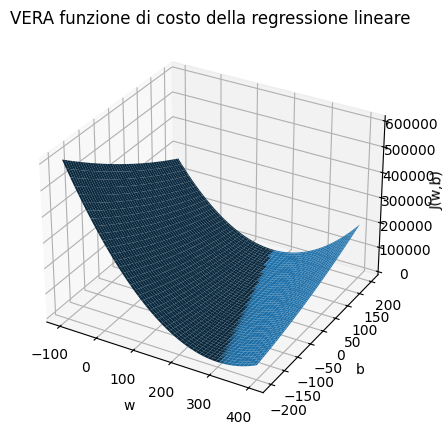

In [12]:
plot_real_cost_surface_3d(x, y)

Gradient Descent: formule + 8 step numerici

Qui implementiamo le derivate esatte per la regressione lineare:
e facciamo vedere numeri step-by-step.

In [71]:
def compute_gradient(x, y, w, b):
    """
    Calcola i gradienti dJ/dw e dJ/db per la regressione lineare.
    """
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        f_wb = w * x[i] + b
        err = f_wb - y[i]
        dj_dw += err * x[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Esegue Gradient Descent e restituisce:
    - w, b finali
    - history: lista di tuple (w, b, J)
    """
    w = w_init
    b = b_init
    history = []

    for it in range(num_iters):
        J = compute_cost(x, y, w, b)
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # salvo lo stato prima dell'update (utile per plot e per spiegare)
        history.append((w, b, J, dj_dw, dj_db))

        # update dei parametri
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b, history


In [96]:
# Parametri iniziali (volutamente 0 e 0 per vedere la discesa)
w0, b0 = 0.0, 0.0

# Learning rate: se è troppo alto può "saltare" e divergere; troppo basso è lentissimo.
alpha = 0.01

# 8 step: abbastanza per una demo 
w_final, b_final, hist = gradient_descent(x, y, w0, b0, alpha, num_iters=8)

# Stampa numerica step-by-step
print("iter |    w      b     |    J(w,b)    |   dJ/dw     dJ/db")
print("-"*65)
for it, (w, b, J, dj_dw, dj_db) in enumerate(hist):
    print(f"{it:>4} | {w:>7.2f} {b:>7.2f} | {J:>11.2f} | {dj_dw:>9.2f} {dj_db:>9.2f}")

print("\nFinale dopo 8 step:")
print("w =", round(w_final, 2), " b =", round(b_final, 2))
print("J =", round(compute_cost(x, y, w_final, b_final), 2))


iter |    w      b     |    J(w,b)    |   dJ/dw     dJ/db
-----------------------------------------------------------------
   0 |    0.00    0.00 |   205000.00 |  -1750.00   -600.00
   1 |   17.50    6.00 |   172203.94 |  -1603.75   -550.25
   2 |   33.54   11.50 |   144656.31 |  -1469.71   -504.65
   3 |   48.23   16.55 |   121517.18 |  -1346.87   -462.86
   4 |   61.70   21.18 |   102081.06 |  -1234.28   -424.56
   5 |   74.05   25.42 |    85755.33 |  -1131.10   -389.46
   6 |   85.36   29.32 |    72042.23 |  -1036.53   -357.29
   7 |   95.72   32.89 |    60523.65 |   -949.86   -327.80

Finale dopo 8 step:
w = 105.22  b = 36.17
J = 50848.4


Contour di J(w,b) + traiettoria del punto (5–10 step)

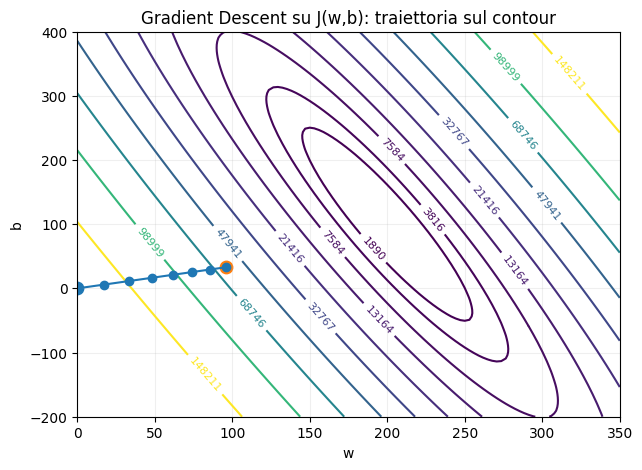

In [97]:
def plot_contour_with_path(x, y, history, w_range=(0, 400), b_range=(-200, 400), n=120):
    w_vals = np.linspace(w_range[0], w_range[1], n)
    b_vals = np.linspace(b_range[0], b_range[1], n)
    W, B = np.meshgrid(w_vals, b_vals)
    J = np.zeros_like(W)

    # calcolo J sulla griglia
    for i in range(n):
        for j in range(n):
            J[i, j] = compute_cost(x, y, W[i, j], B[i, j])

    plt.figure(figsize=(7,5))
    levels = np.percentile(J, [5,10,20,30,40,50,60,70,80,90])
    cs = plt.contour(W, B, J, levels=levels)
    plt.clabel(cs, inline=True, fontsize=8)

    # estraggo la traiettoria (w,b) dagli step di GD
    w_path = [h[0] for h in history]
    b_path = [h[1] for h in history]

    # disegno il percorso: linea + punti
    plt.plot(w_path, b_path, marker='o')
    plt.scatter([w_path[0]], [b_path[0]], marker='o', s=80)   # start
    plt.scatter([w_path[-1]], [b_path[-1]], marker='o', s=80) # end

    plt.xlabel("w")
    plt.ylabel("b")
    plt.title("Gradient Descent su J(w,b): traiettoria sul contour")
    plt.grid(True, alpha=0.2)
    plt.show()


plot_contour_with_path(x, y, hist, w_range=(0, 350), b_range=(-200, 400), n=120)
